#***Practical:***

###1.  Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

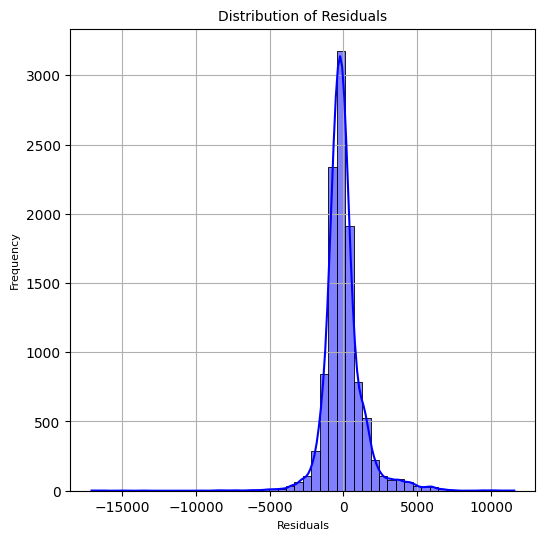

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Drop rows with missing values
diamonds.dropna(inplace=True)

# Encode categorical variables ('cut', 'color', 'clarity') using LabelEncoder
label_encoder = LabelEncoder()
diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])

# Select features (independent variables) and target (dependent variable)
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']]  # Features
y = diamonds['price']  # Target variable (Price)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the residuals (errors)
residuals = y_test - y_pred

# Plot the distribution of residuals using Seaborn
plt.figure(figsize=(6, 6))
sns.histplot(residuals, kde=True, color='blue', bins=50)

# Customize the plot
plt.title('Distribution of Residuals', fontsize=10)
plt.xlabel('Residuals', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.grid(True)

# Show the plot
plt.show()


###2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

In [4]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Drop rows with missing values
diamonds.dropna(inplace=True)

# Encode categorical variables ('cut', 'color', 'clarity') using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])

# Select features (independent variables) and target (dependent variable)
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']]  # Features
y = diamonds['price']  # Target variable (Price)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Squared Error (MSE): 1825912.9915
Mean Absolute Error (MAE): 858.7085
Root Mean Squared Error (RMSE): 1351.2635


###3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

<Figure size 400x400 with 0 Axes>

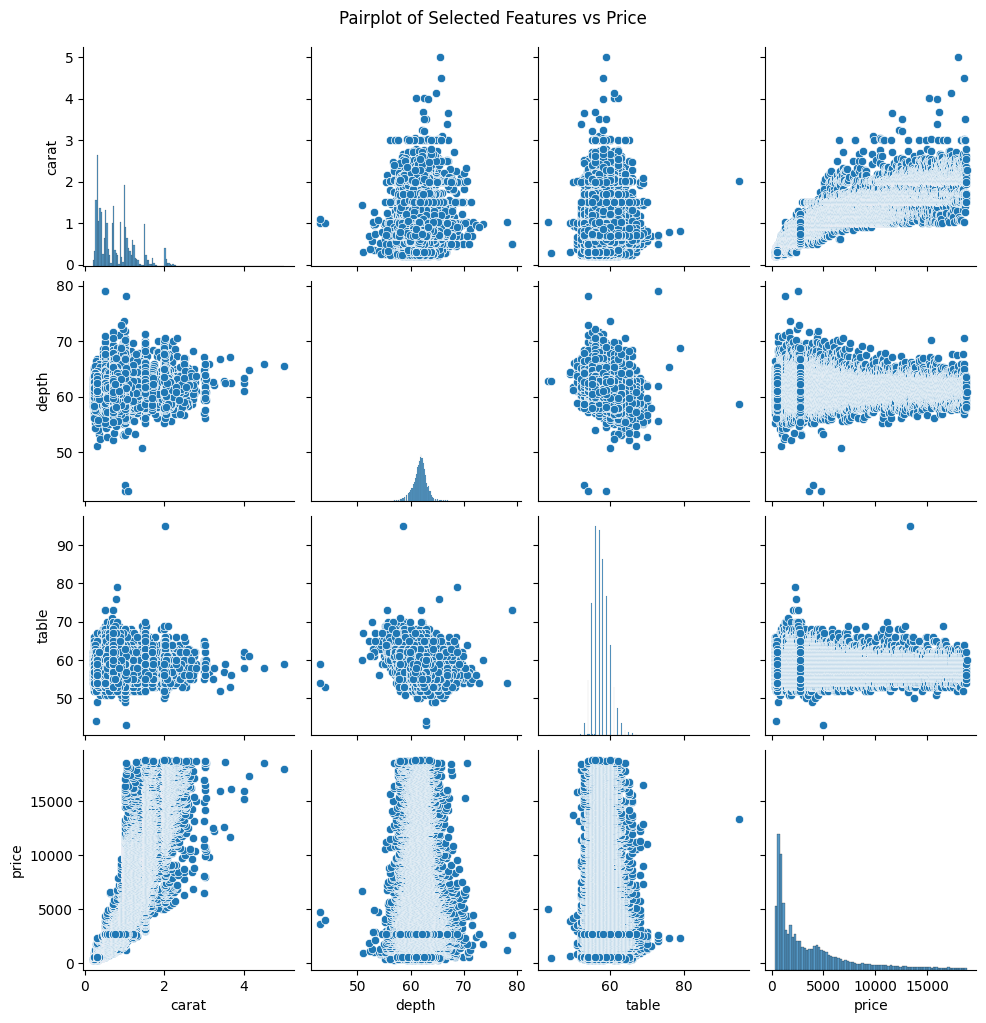

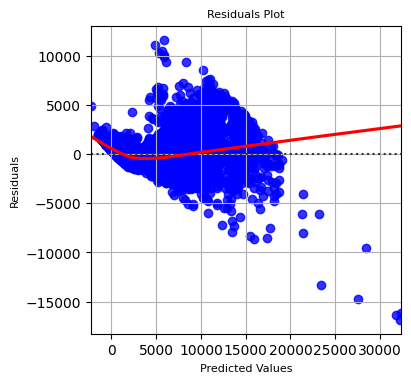

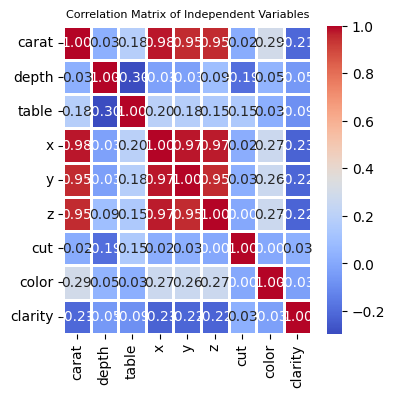

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

# Load Seaborn's diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Drop rows with missing values
diamonds.dropna(inplace=True)

# Encode categorical variables ('cut', 'color', 'clarity') using LabelEncoder
label_encoder = LabelEncoder()
diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])

# Select features (independent variables) and target (dependent variable)
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']]  # Features
y = diamonds['price']  # Target variable (Price)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (errors)
residuals = y_test - y_pred

# --- Check 1: Linearity ---
# Scatter plot of selected features vs target variable
plt.figure(figsize=(4, 4))
sns.pairplot(diamonds[['carat', 'depth', 'table', 'price']])
plt.suptitle('Pairplot of Selected Features vs Price', y=1.02)
plt.show()

# --- Check 2: Homoscedasticity ---
# Residuals plot
plt.figure(figsize=(4, 4))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', line_kws={'color': 'red'})
plt.title('Residuals Plot', fontsize=8)
plt.xlabel('Predicted Values', fontsize=8)
plt.ylabel('Residuals', fontsize=8)
plt.grid(True)
plt.show()

# --- Check 3: Multicollinearity ---
# Correlation matrix
correlation_matrix = X.corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix of Independent Variables', fontsize=8)
plt.show()

###4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Drop rows with missing values
diamonds.dropna(inplace=True)

# Encode categorical variables ('cut', 'color', 'clarity') using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
diamonds['cut'] = label_encoder.fit_transform(diamonds['cut'])
diamonds['color'] = label_encoder.fit_transform(diamonds['color'])
diamonds['clarity'] = label_encoder.fit_transform(diamonds['clarity'])

# Select features (independent variables) and target (dependent variable)
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']]  # Features
y = diamonds['price']  # Target variable (Price)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Create a function to evaluate different regression models ---
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the performance using different metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print('-' * 40)

# --- Define and evaluate models using a pipeline ---

# 1. Linear Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())
])
evaluate_model(lr_pipeline, X_train, X_test, y_train, y_test)

# 2. Decision Tree Regressor
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', DecisionTreeRegressor(random_state=42))
])
evaluate_model(dt_pipeline, X_train, X_test, y_train, y_test)

# 3. Random Forest Regressor
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', RandomForestRegressor(random_state=42))
])
evaluate_model(rf_pipeline, X_train, X_test, y_train, y_test)

Model: Pipeline
Mean Squared Error (MSE): 1825912.9915
Mean Absolute Error (MAE): 858.7085
Root Mean Squared Error (RMSE): 1351.2635
R-squared: 0.8851
----------------------------------------
Model: Pipeline
Mean Squared Error (MSE): 533022.3209
Mean Absolute Error (MAE): 355.9410
Root Mean Squared Error (RMSE): 730.0838
R-squared: 0.9665
----------------------------------------
Model: Pipeline
Mean Squared Error (MSE): 293978.6712
Mean Absolute Error (MAE): 267.7209
Root Mean Squared Error (RMSE): 542.1980
R-squared: 0.9815
----------------------------------------


###5.  Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the Seaborn diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Drop rows with missing values
diamonds.dropna(inplace=True)

# Select one feature (e.g., 'carat') and target variable ('price') for simple linear regression
X = diamonds[['carat']]  # Feature (independent variable)
y = diamonds['price']  # Target variable (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_[0]:.4f}")  # Coefficient (slope)
print(f"Model Intercept: {model.intercept_:.4f}")  # Intercept
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")

Model Coefficients: 7768.9105
Model Intercept: -2261.9117
R-squared Score: 0.8489


###6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

Model Coefficients: 0.1070
Model Intercept: 0.9252
R-squared Score: 0.5449


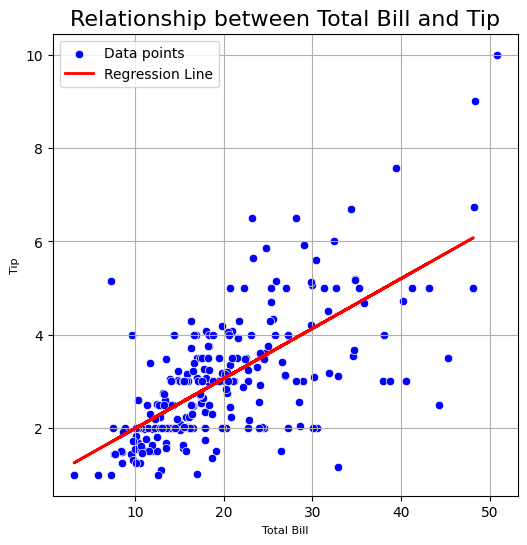

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the Seaborn tips dataset
tips = sns.load_dataset('tips')

# Select the features and target variable for simple linear regression
X = tips[['total_bill']]  # Feature (independent variable)
y = tips['tip']  # Target variable (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_[0]:.4f}")  # Coefficient (slope)
print(f"Model Intercept: {model.intercept_:.4f}")  # Intercept
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")

# Visualize the relationship between total_bill and tip with the regression line
plt.figure(figsize=(6, 6))
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.title('Relationship between Total Bill and Tip', fontsize=16)
plt.xlabel('Total Bill', fontsize=8)
plt.ylabel('Tip', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()


###7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

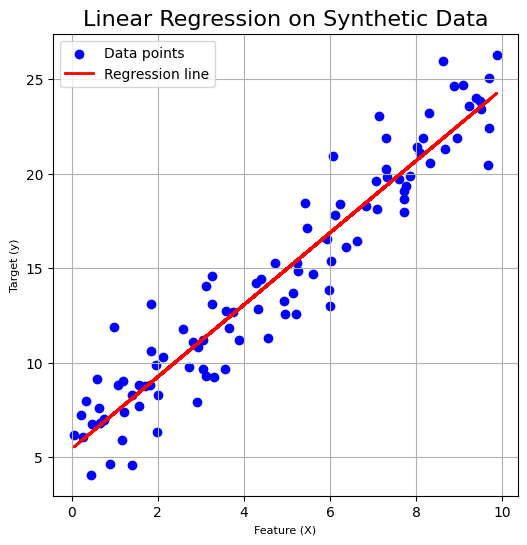

Model Coefficient (Slope): 1.9080
Model Intercept: 5.4302


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Create a synthetic dataset
# Generate 100 random values for the feature (X)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10

# Generate a target variable (y) with a linear relationship to X
# y = 2 * X + 5 + noise (we add some noise to make it more realistic)
y = 2 * X + 5 + np.random.randn(100, 1) * 2  # Adding noise

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions using the fitted model
y_pred = model.predict(X)

# Step 4: Plot the data points and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')  # Plot the regression line

# Adding labels and title
plt.title('Linear Regression on Synthetic Data', fontsize=16)
plt.xlabel('Feature (X)', fontsize=8)
plt.ylabel('Target (y)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print the model's coefficients and intercept
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.4f}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")


###8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [16]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Create a synthetic dataset
# Generate 100 random values for the feature (X)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10

# Generate a target variable (y) with a linear relationship to X
# y = 2 * X + 5 + noise (we add some noise to make it more realistic)
y = 2 * X + 5 + np.random.randn(100, 1) * 2  # Adding noise

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Save the trained model to a file using pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Step 5: Print confirmation
print("Model has been pickled and saved to 'linear_regression_model.pkl'")

# Load the pickled model
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now, you can use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
print("Predictions on the test set:", y_pred[:5])  # Print first 5 predictions


Model has been pickled and saved to 'linear_regression_model.pkl'
Predictions on the test set: [[ 6.50597502]
 [22.46409093]
 [20.110837  ]
 [18.00446213]
 [10.25370219]]


###9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

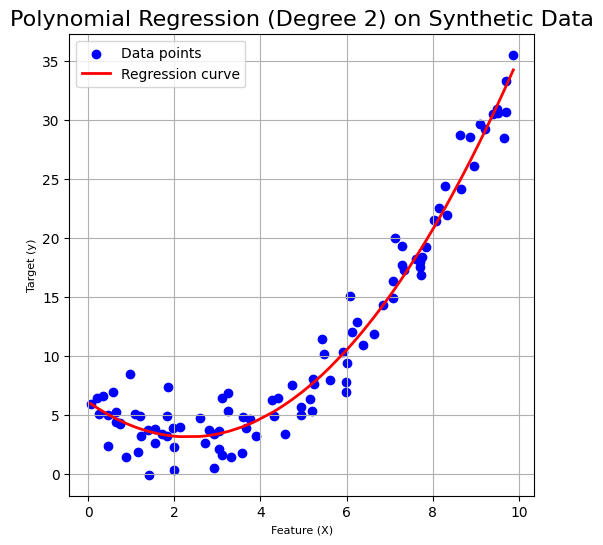

Model Coefficients: [[ 0.         -2.54444824  0.5464851 ]]
Model Intercept: [6.12280544]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Create a synthetic dataset
# Generate 100 random values for the feature (X)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10

# Generate a target variable (y) with a polynomial relationship to X
# y = 0.5 * X^2 - 2 * X + 5 + noise (we add some noise to make it more realistic)
y = 0.5 * (X**2) - 2 * X + 5 + np.random.randn(100, 1) * 2  # Adding noise

# Step 2: Transform the feature into polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transform X to include X^2 term

# Step 3: Fit a linear regression model to the polynomial data
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predict the target variable using the fitted model
y_pred = model.predict(X_poly)

# Step 5: Plot the data points and the regression curve
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(np.sort(X, axis=0), model.predict(poly.transform(np.sort(X, axis=0).reshape(-1, 1))), color='red', linewidth=2, label='Regression curve')  # Plot the regression curve

# Adding labels and title
plt.title('Polynomial Regression (Degree 2) on Synthetic Data', fontsize=16)
plt.xlabel('Feature (X)', fontsize=8)
plt.ylabel('Target (y)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

###10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for simple linear regression
# Generate 100 random values for the feature (X)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10

# Generate a target variable (y) with a linear relationship to X
# y = 3 * X + 7 + noise (we add some noise to make it more realistic)
y = 3 * X + 7 + np.random.randn(100, 1) * 2  # Adding noise

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Print the model's coefficients and intercept
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.4f}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")

Model Coefficient (Slope): 2.9080
Model Intercept: 7.4302


###11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

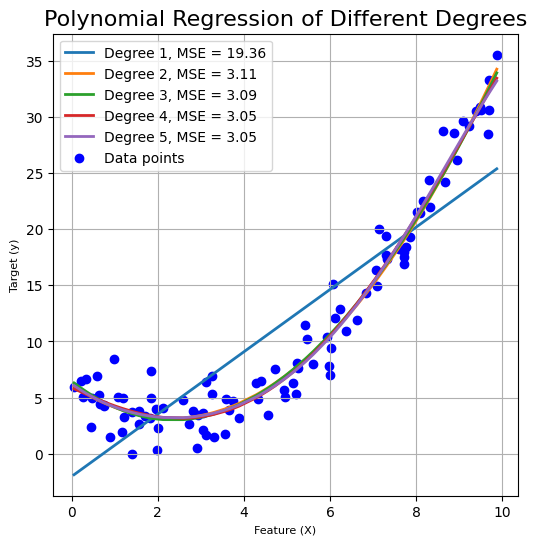

Mean Squared Error (MSE) for each degree:
Degree 1: MSE = 19.36
Degree 2: MSE = 3.11
Degree 3: MSE = 3.09
Degree 4: MSE = 3.05
Degree 5: MSE = 3.05


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Step 1: Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 0.5 * (X**2) - 2 * X + 5 + np.random.randn(100, 1) * 2  # Polynomial relationship with noise

# Step 2: Initialize a plot to compare models
plt.figure(figsize=(6, 6))

# Step 3: Fit polynomial regression models of different degrees
degrees = [1, 2, 3, 4, 5]
mse_values = []  # List to store the MSE values for each degree

for degree in degrees:
    # Transform X to include polynomial features of the given degree
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit a linear regression model to the polynomial features
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate Mean Squared Error (MSE) to evaluate the model
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)

    # Plot the polynomial regression curve
    X_sorted = np.sort(X, axis=0)
    X_poly_sorted = poly.transform(X_sorted)
    y_pred_sorted = model.predict(X_poly_sorted)

    plt.plot(X_sorted, y_pred_sorted, label=f'Degree {degree}, MSE = {mse:.2f}', linewidth=2)

# Step 4: Visualize the dataset and the regression curves
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.title('Polynomial Regression of Different Degrees', fontsize=16)
plt.xlabel('Feature (X)', fontsize=8)
plt.ylabel('Target (y)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print the MSE values for each degree
print("Mean Squared Error (MSE) for each degree:")
for degree, mse in zip(degrees, mse_values):
    print(f"Degree {degree}: MSE = {mse:.2f}")


###12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with two features
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # Two features, each between 0 and 10
# Target variable with a linear relationship to the two features
# y = 3 * X1 + 2 * X2 + 5 + noise
y = 3 * X[:, 0] + 2 * X[:, 1] + 5 + np.random.randn(100) * 2  # Adding noise

# Step 2: Fit a linear regression model with two features
model = LinearRegression()
model.fit(X, y)

# Step 3: Print the model's coefficients, intercept, and R-squared score
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"R-squared Score: {model.score(X, y):.4f}")

Model Coefficients: [3.06773335 2.07098921]
Model Intercept: 4.544544528203414
R-squared Score: 0.9676


###13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

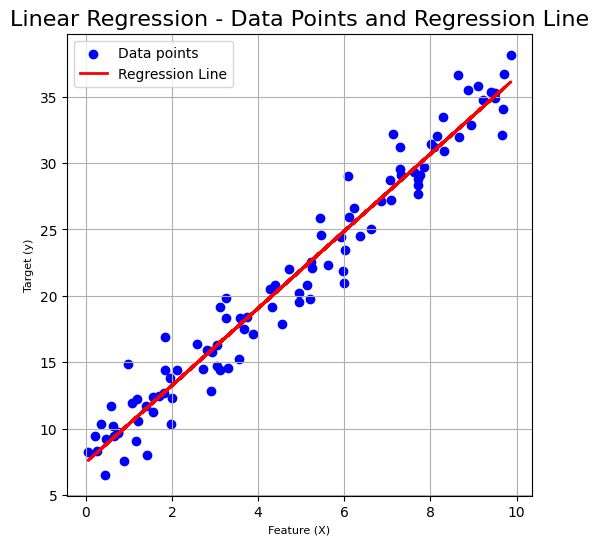

Model Coefficient (Slope): 2.9080
Model Intercept: 7.4302


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = 3 * X + 7 + np.random.randn(100, 1) * 2  # Linear relationship with added noise

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions using the fitted model
y_pred = model.predict(X)

# Step 4: Visualize the data points and regression line
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')  # Plot the regression line
plt.title('Linear Regression - Data Points and Regression Line', fontsize=16)
plt.xlabel('Feature (X)', fontsize=8)
plt.ylabel('Target (y)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print the model's coefficients and intercept
print(f"Model Coefficient (Slope): {model.coef_[0][0]:.4f}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")

###14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [23]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Generate a synthetic dataset with multiple features
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1
X2 = 2 * X1 + np.random.rand(100) * 5  # Feature 2 (high correlation with Feature 1)
X3 = np.random.rand(100) * 10  # Feature 3 (low correlation with other features)
y = 3 * X1 + 2 * X2 + 5 * X3 + np.random.randn(100) * 2  # Target variable with noise

# Step 2: Create a DataFrame with features
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Step 3: Add a constant to the features (for intercept in the VIF calculation)
X_with_const = add_constant(data)

# Step 4: Calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# Step 5: Print the VIF results
print("Variance Inflation Factors (VIF) for each feature:")
print(vif_data)

Variance Inflation Factors (VIF) for each feature:
  Feature        VIF
0   const  11.112919
1      X1  17.543227
2      X2  17.609993
3      X3   1.023792


###15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

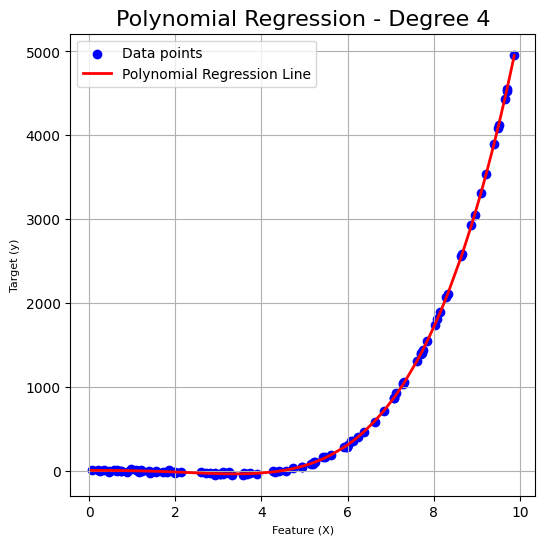

Model Coefficients: [[ 0.         -1.1383922   1.16600212 -4.6265785   0.97934888]]
Model Intercept: [5.45124216]


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for a polynomial relationship (degree 4)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
# Polynomial relationship: y = X^4 - 5X^3 + 3X^2 - 2X + 1 + noise
y = X**4 - 5*X**3 + 3*X**2 - 2*X + 1 + np.random.randn(100, 1) * 10  # Adding noise

# Step 2: Transform the feature to include polynomial terms (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Step 3: Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Make predictions using the fitted model
y_pred = model.predict(X_poly)

# Step 5: Plot the data points and the regression curve
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(np.sort(X, axis=0), model.predict(poly.transform(np.sort(X, axis=0))), color='red', linewidth=2, label='Polynomial Regression Line')  # Plot the regression curve
plt.title('Polynomial Regression - Degree 4', fontsize=16)
plt.xlabel('Feature (X)', fontsize=8)
plt.ylabel('Target (y)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

###16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with multiple features
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # 3 features
y = 3 * X[:, 0] + 2 * X[:, 1] - X[:, 2] + np.random.randn(100) * 5  # Linear relationship with noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 3.1: Data standardization
    ('regressor', LinearRegression())  # Step 3.2: Multiple Linear Regression model
])

# Step 4: Train the pipeline
pipeline.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 6: Evaluate the model's performance using R-squared
r2 = r2_score(y_test, y_pred)

# Step 7: Print the R-squared score
print(f"R-squared score: {r2:.4f}")

R-squared score: 0.7268


###17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve

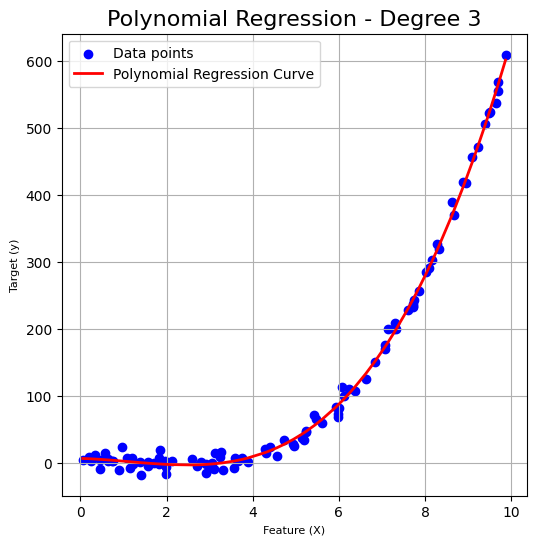

Model Coefficients: [[ 0.         -1.87414005 -3.22128437  0.96321596]]
Model Intercept: [7.34459907]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for a polynomial relationship (degree 3)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
# Polynomial relationship: y = X^3 - 4X^2 + 3X + noise
y = X**3 - 4*X**2 + 3*X + np.random.randn(100, 1) * 10  # Adding noise

# Step 2: Transform the feature to include polynomial terms (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Step 3: Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Make predictions using the fitted model
y_pred = model.predict(X_poly)

# Step 5: Plot the data points and the regression curve
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(np.sort(X, axis=0), model.predict(poly.transform(np.sort(X, axis=0))), color='red', linewidth=2, label='Polynomial Regression Curve')  # Plot the regression curve
plt.title('Polynomial Regression - Degree 3', fontsize=16)
plt.xlabel('Feature (X)', fontsize=8)
plt.ylabel('Target (y)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Print the model's coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

###1. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with 5 features
np.random.seed(42)
X = np.random.rand(100, 5) * 10  # 5 features with values between 0 and 10
# Linear relationship with noise: y = 2*X1 + 3*X2 - X3 + 4*X4 + 5*X5 + noise
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 4 * X[:, 3] + 5 * X[:, 4] + np.random.randn(100) * 5

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Step 6: Print the R-squared score and model coefficients
print(f"R-squared score: {r2:.4f}")
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

R-squared score: 0.9421
Model Coefficients: [ 1.82647934  2.88303834 -0.67604835  4.0727923   4.77717992]
Model Intercept: 0.7299237199349733


###19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

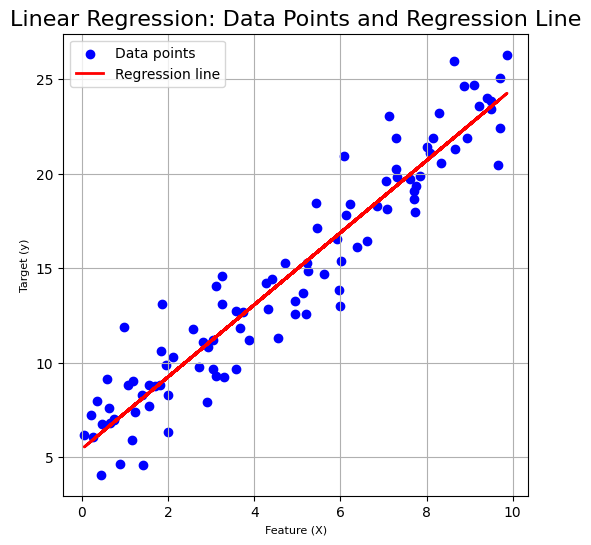

Model Coefficient: 1.9080
Model Intercept: 5.4302


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Generate synthetic data for linear regression
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 data points, feature values between 0 and 10
y = 2 * X + 5 + np.random.randn(100, 1) * 2  # Linear relationship with noise (y = 2X + 5 + noise)

# Step 2: Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions using the model
y_pred = model.predict(X)

# Step 4: Visualize the data points and the regression line
plt.figure(figsize=(6, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')  # Plot the regression line
plt.title('Linear Regression: Data Points and Regression Line', fontsize=16)
plt.xlabel('Feature (X)', fontsize=8)
plt.ylabel('Target (y)', fontsize=8)
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print the model's coefficient and intercept
print(f"Model Coefficient: {model.coef_[0][0]:.4f}")
print(f"Model Intercept: {model.intercept_[0]:.4f}")

###20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data with 3 features
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # 100 data points with 3 features, values between 0 and 10
# Linear relationship: y = 3*X1 + 5*X2 - 2*X3 + noise
y = 3 * X[:, 0] + 5 * X[:, 1] - 2 * X[:, 2] + np.random.randn(100) * 5  # Add some noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions using the model
y_pred = model.predict(X_test)

# Step 5: Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Step 6: Print the R-squared score and model coefficients
print(f"R-squared score: {r2:.4f}")
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

R-squared score: 0.8691
Model Coefficients: [ 3.05294884  4.962303   -1.65697038]
Model Intercept: -0.42505220816460465


###21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [30]:
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # 100 data points with 3 features, values between 0 and 10
y = 3 * X[:, 0] + 5 * X[:, 1] - 2 * X[:, 2] + np.random.randn(100) * 5  # Linear relationship with noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Save the model using joblib (serialize)
joblib.dump(model, 'linear_regression_model.joblib')

# Step 5: Load the model from the file (deserialize)
loaded_model = joblib.load('linear_regression_model.joblib')

# Step 6: Make predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Step 7: Print the model's coefficients and intercept
print(f"Model Coefficients: {loaded_model.coef_}")
print(f"Model Intercept: {loaded_model.intercept_}")

Model Coefficients: [ 3.05294884  4.962303   -1.65697038]
Model Intercept: -0.42505220816460465


###22.  Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the 'tips' dataset from Seaborn
tips = sns.load_dataset('tips')

# Step 2: Prepare the data (selecting relevant columns)
# We'll use 'total_bill' as the feature and 'tip' as the target variable.
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]  # Include categorical features
y = tips['tip']  # Target variable: tip amount

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a column transformer with one-hot encoding for categorical variables
# We will apply one-hot encoding to the categorical columns: 'sex', 'smoker', 'day', and 'time'
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'day', 'time']),  # Drop first to avoid multicollinearity
        ('num', 'passthrough', ['total_bill'])  # Keep 'total_bill' as is (numerical)
    ])

# Step 5: Create a pipeline with the column transformer and linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),  # Preprocessing step: One-hot encode categorical features
    ('model', LinearRegression())  # Linear regression model
])

# Step 6: Train the model using the training data
pipeline.fit(X_train, y_train)

# Step 7: Make predictions using the test set
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 9: Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared score: {r2:.4f}")

# Step 10: Optionally, print the model coefficients
# Note: Coefficients are available after fitting, but interpreting them directly for categorical variables can be tricky
coefficients = pipeline.named_steps['model'].coef_
print(f"Model Coefficients: {coefficients}")

Mean Squared Error (MSE): 0.6533
R-squared score: 0.4774
Model Coefficients: [ 0.02285672 -0.25897469 -0.12363265  0.0664546  -0.19172494  0.18641624
  0.1092622 ]


###23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3) * 10  # 100 data points with 3 features (values between 0 and 10)
y = 3 * X[:, 0] + 5 * X[:, 1] - 2 * X[:, 2] + np.random.randn(100) * 5  # Linear relationship with noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  # Regularization strength for Ridge Regression

# Step 4: Train both models
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

# Step 6: Calculate R-squared scores
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Step 7: Print the coefficients and R-squared scores
print("Linear Regression Coefficients:", linear_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print(f"Linear Regression R-squared: {r2_linear:.4f}")
print(f"Ridge Regression R-squared: {r2_ridge:.4f}")

Linear Regression Coefficients: [ 3.05294884  4.962303   -1.65697038]
Ridge Regression Coefficients: [ 3.0486218   4.95613491 -1.65535958]
Linear Regression R-squared: 0.8691
Ridge Regression R-squared: 0.8691


###24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

# Step 1: Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)

# Step 2: Initialize the Linear Regression model
model = LinearRegression()

# Step 3: Perform cross-validation
# Use 5-fold cross-validation to evaluate the model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # R-squared scoring

# Step 4: Print the cross-validation scores and mean R-squared score
print("Cross-validation R-squared scores:", cv_scores)
print(f"Mean R-squared score: {cv_scores.mean():.4f}")

Cross-validation R-squared scores: [0.99999808 0.99999849 0.99999893 0.99999836 0.99999788]
Mean R-squared score: 1.0000


###25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

Degree 1 Polynomial Regression:
  R-squared: 0.9423
  Coefficients: [ 0.         30.87442075]
  Intercept: [-39.43036366]



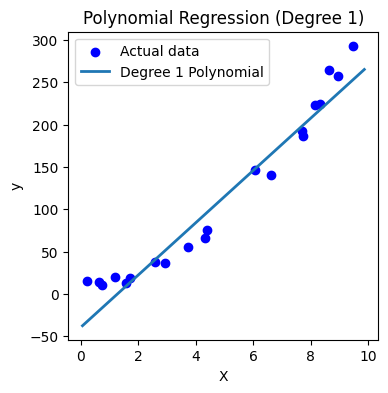

Degree 2 Polynomial Regression:
  R-squared: 0.9933
  Coefficients: [ 0.         -0.76433741  3.24214404]
  Intercept: [10.13066788]



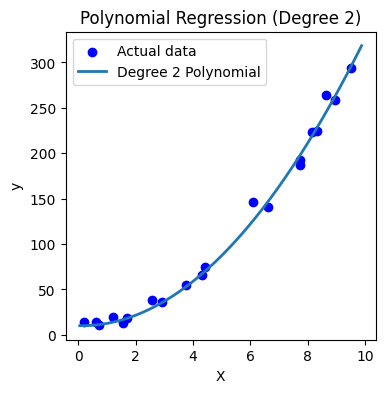

Degree 3 Polynomial Regression:
  R-squared: 0.9933
  Coefficients: [ 0.         -3.43143788  3.91206701 -0.04470739]
  Intercept: [12.31509717]



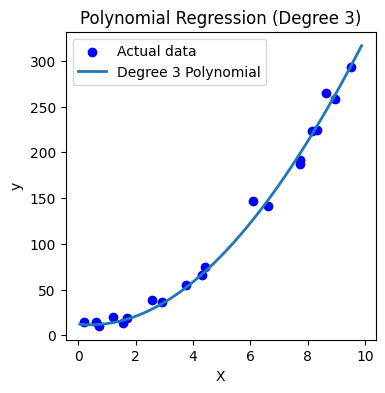

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Step 1: Generate synthetic data (for example, a quadratic relationship)
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
y = 3 * X**2 + 2 * X + 5 + np.random.randn(100, 1) * 10  # Quadratic relation with noise

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Function to fit and evaluate polynomial regression models
def evaluate_polynomial_model(degree):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    return r2, model, poly # Return the model and poly instance

# Step 4: Compare polynomial models of different degrees (1, 2, 3)
degrees = [1, 2, 3]
for degree in degrees:
    r2, model, poly = evaluate_polynomial_model(degree) # Get the model and poly
    print(f"Degree {degree} Polynomial Regression:")
    print(f"  R-squared: {r2:.4f}")
    print(f"  Coefficients: {model.coef_.flatten()}")
    print(f"  Intercept: {model.intercept_}\n")

    # Plot the results
    plt.figure(figsize=(4, 4))
    plt.scatter(X_test, y_test, color='blue', label='Actual data')
    X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    X_range_poly = poly.transform(X_range) # Use the returned poly instance
    y_range_pred = model.predict(X_range_poly) # Use the fitted model
    plt.plot(X_range, y_range_pred, label=f"Degree {degree} Polynomial", linewidth=2)
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()